In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.visualization import tumor_misfit_barplot
from src.utils.equations import tumor_misfit_error

In [4]:
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, tumor_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

In [13]:
#res = pc[:, 0:3].dot(pca.components_[0:3, :])
n_comp = 3
res = np.dot(pc[:,:n_comp], pca.components_[:n_comp,:]) + np.mean(sites, axis=0)

In [14]:
np.subtract(sites, res)

array([[-6.53699809e-01, -9.75053740e-01,  1.05649167e+01, ...,
        -2.69085930e+00, -8.23349462e-01, -2.14623072e-01],
       [ 7.17596722e+00,  4.00955223e+00,  1.66323879e+01, ...,
        -3.23297661e+00, -3.35314936e+00,  1.19264794e+00],
       [ 2.82025210e+00,  2.23434741e-01,  2.63982439e+01, ...,
        -8.61034190e-01, -2.14907132e+00, -1.20685001e+00],
       ...,
       [-2.08606952e+00, -4.41936001e-01, -2.47867241e+00, ...,
        -2.70678819e+00, -1.51285589e+00,  1.95948815e-02],
       [ 3.57654022e+00, -9.21276956e-01,  1.66193750e+01, ...,
        -5.34512983e+00, -2.48954635e+00, -7.02462890e-01],
       [ 3.18665476e+00, -7.00758202e-01,  1.56086087e+01, ...,
        -4.13678935e+00, -1.79564604e+00,  4.73842205e+00]])

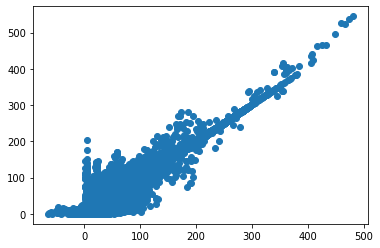

In [15]:
#control scatter plot
plt.scatter(res.flatten(), sites.flatten())
plt.show()

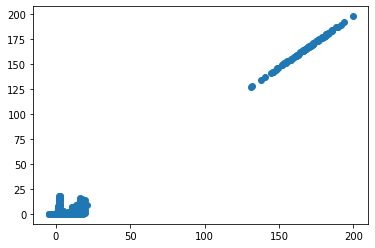

In [28]:
#control scatter plot
tumor_id = 15
plt.scatter(res[np.where(tumor_ids == tumor_id)[0]].flatten(), sites[np.where(tumor_ids == tumor_id)[0]].flatten())
plt.show()

In [12]:
#n_comp = 3
#res = np.dot(pc[:,:n_comp], pca.components_[:n_comp,:]) + np.mean(sites, axis=0)

In [21]:
e = np.array([tumor_misfit_error(sites[np.where(tumor_ids == p_id)[0], :], res[np.where(tumor_ids == p_id)[0], :]) for p_id in full_patient_ids])


996048.87
24694.36
471691.7
1172149.77
777416.5700000001
868914.1799999999
70160.6
128750.45
900383.96
143243.77000000002
103428.64
209330.27000000002
294355.20999999996
116353.36
22981.55
966218.77
659245.59
31001.0
362498.74
421244.65
334133.43000000005
84815.25
226292.11000000002
71010.14
273746.22222222225
785390.62
190602.92
2232504.65
293342.92
153848.83000000002
240698.12
93247.23999999999
270154.02
3118658.2699999996
140431.89
754793.74
159759.27000000002
346423.79999999993
323065.07
170782.0


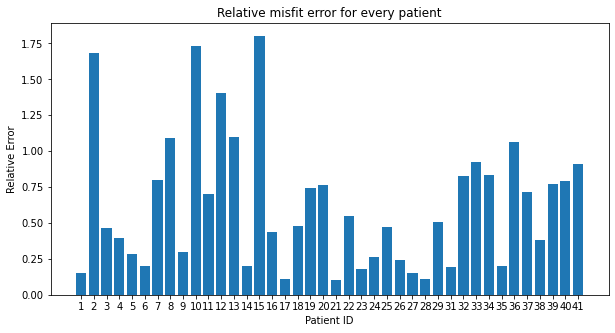

In [22]:
tumor_misfit_barplot(full_patient_ids, e)

<AxesSubplot:ylabel='Count'>

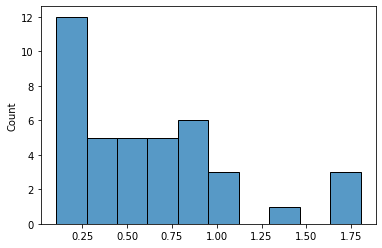

In [25]:
import seaborn as sns
sns.histplot(e, bins=10)